In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#DATA CLEANING

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df=df.drop(123,).reset_index(drop=True)

In [10]:
df_copy=df

In [11]:
df_copy['Region']=df_copy['Region'].astype(int)

In [12]:
df_copy.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       245 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.9+ KB


In [14]:
df_copy=df_copy.dropna().reset_index(drop=True)

In [15]:
df_copy.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df_copy=df_copy.drop(122).reset_index(drop=True)

In [17]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
df_copy.columns=df_copy.columns.str.strip()

In [19]:
#Change the required columns as integer datatype
df_copy[['month','day','year','Temperature','RH','Ws']]=df_copy[['month','day','year','Temperature','RH','Ws']].astype(int)

In [20]:
#List of all columns having object type datatype
objects=[i for i in df_copy.columns if df_copy[i].dtype=='O']

In [21]:
#Converting all columns in object list to float except "Classes"
for i in objects:
    if i !='Classes':
        df_copy[i]=df_copy[i].astype(float)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [23]:
df_copy.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.152893,62.004132,15.508264,0.763223,77.928099,14.730992,49.601240,4.759504,16.747934,7.063636,0.495868
std,8.809501,1.112888,0.0,3.635545,14.847635,2.808171,2.007354,14.316912,12.393811,47.690192,4.154248,14.229690,7.442923,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Exploratory Data Analysis

In [24]:
df_copy=df_copy.drop(['day','month','year'],axis=1)

In [25]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [26]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [27]:
df_copy['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

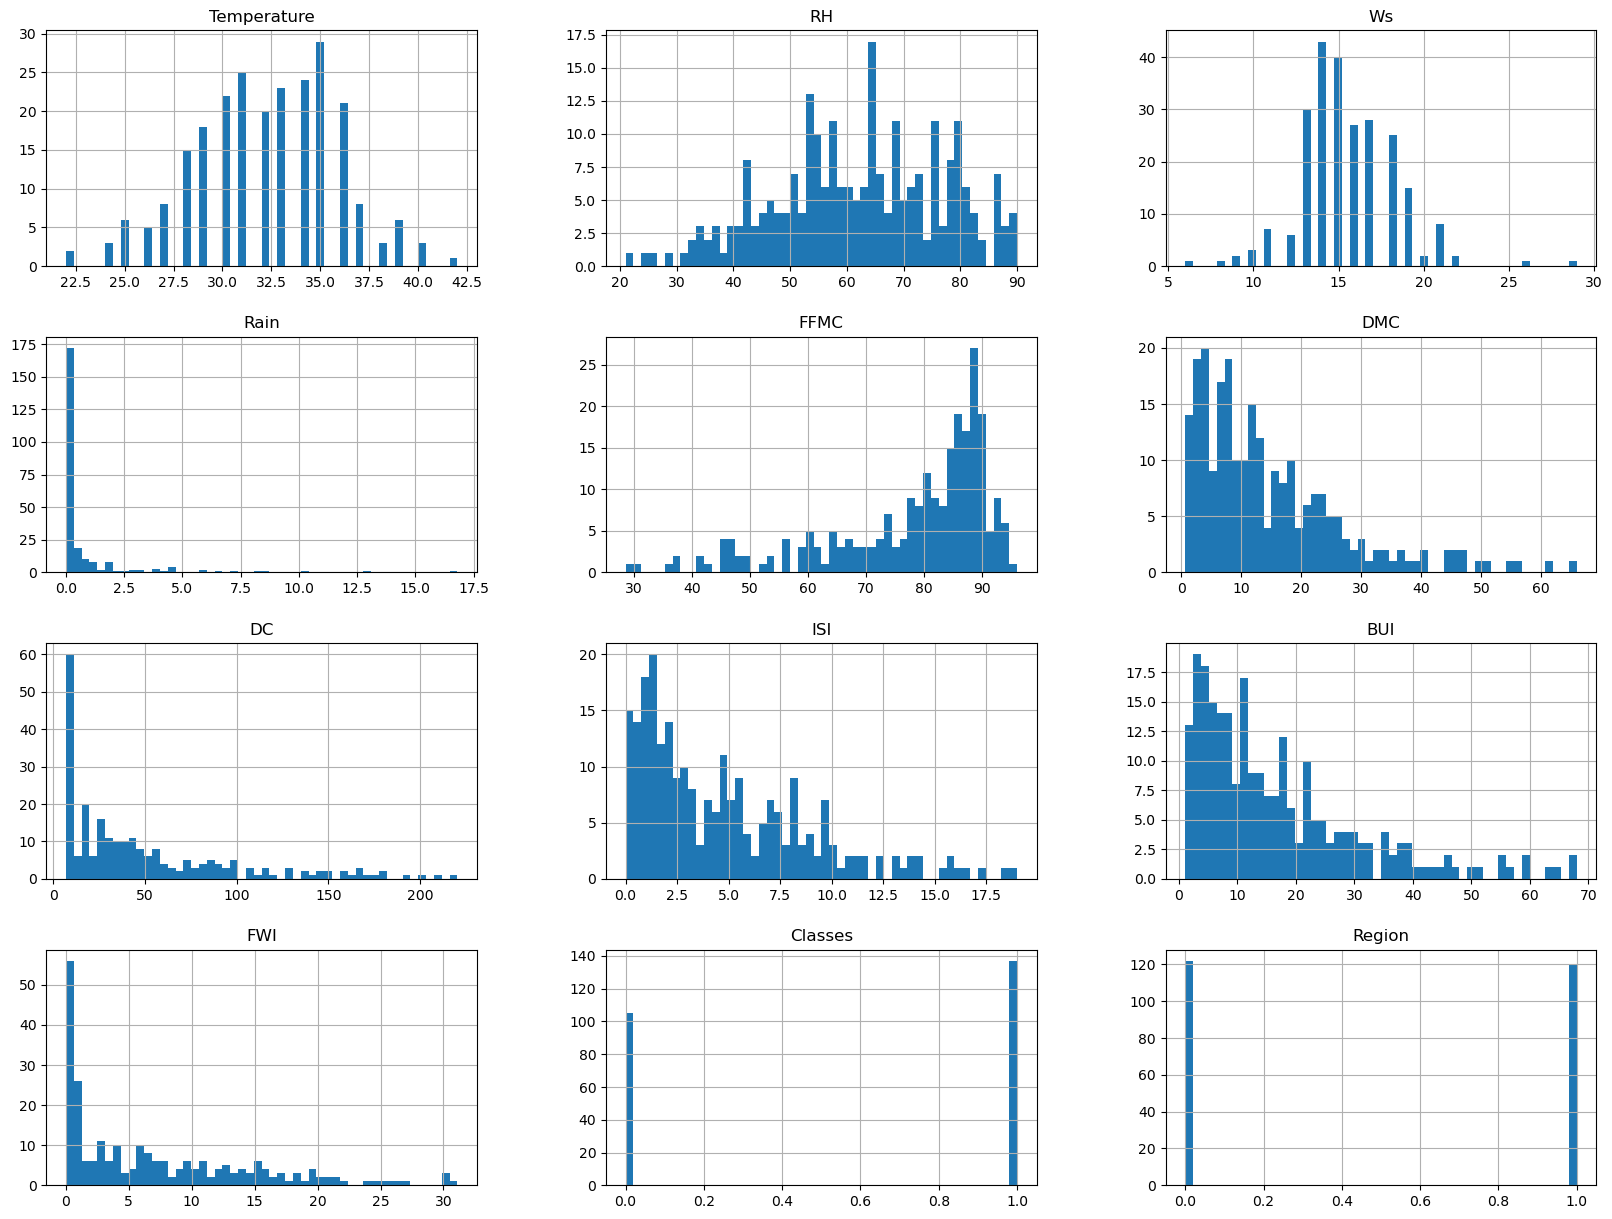

In [28]:
df_copy.hist(bins=50,figsize=(20,15))

In [29]:
#Percentage for a pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

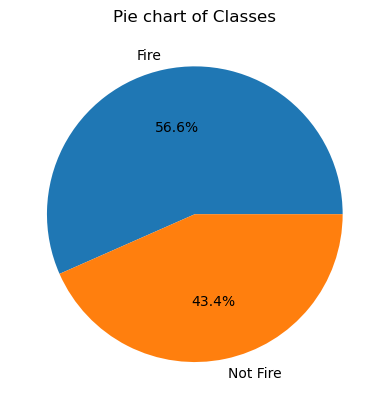

In [30]:
#Pie Chart
classlabel=["Fire",'Not Fire']
plt.pie(percentage,labels=classlabel,autopct="%1.1f%%")
plt.title("Pie chart of Classes")
plt.show()

<Axes: >

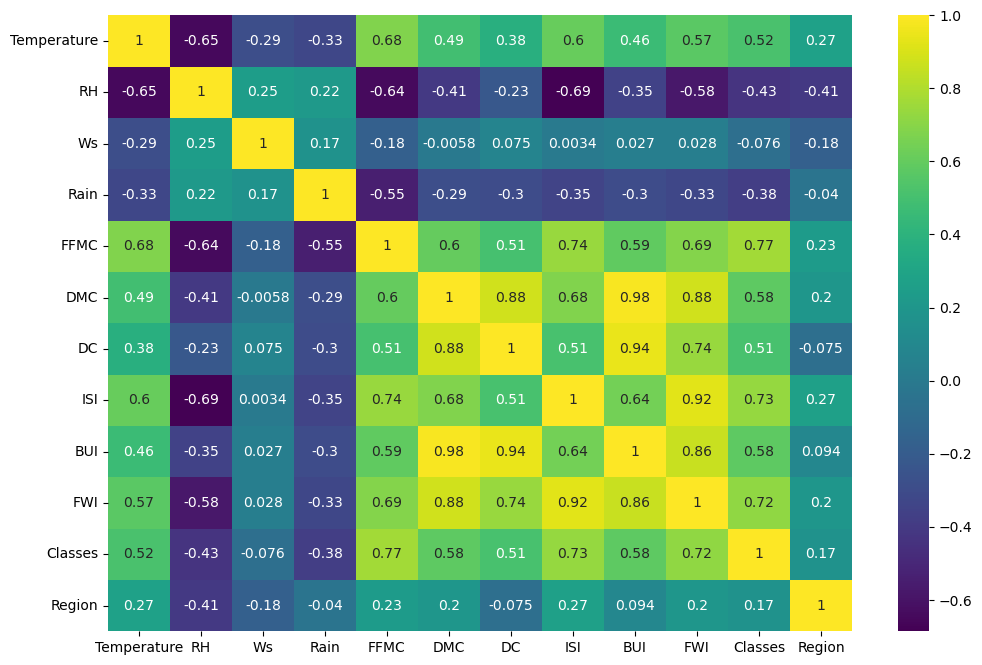

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(),annot=True,cmap='viridis')

In [32]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:
df.iloc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


Text(0.5, 1.0, 'Fire analysis of sidi-bel Region')

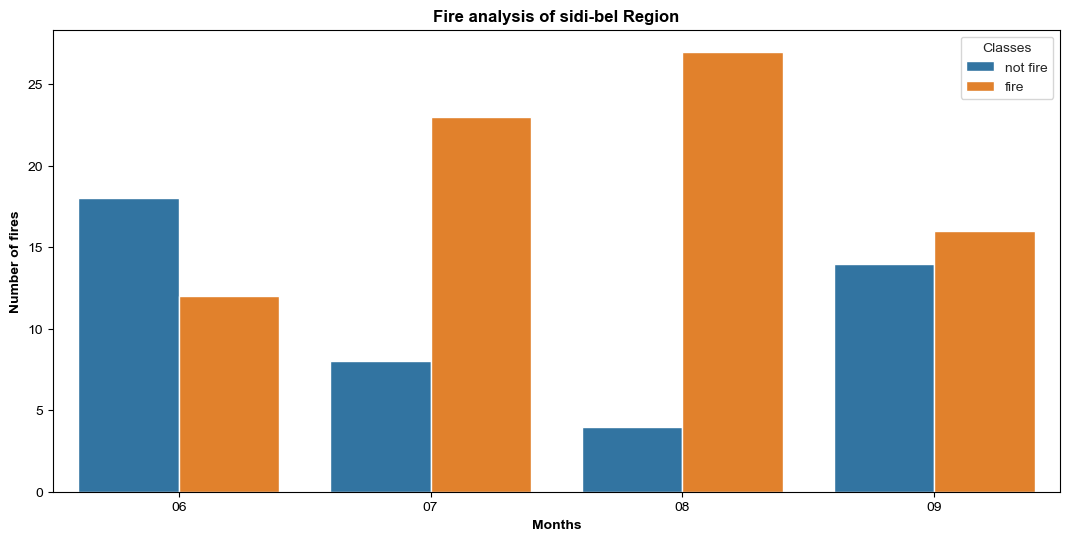

In [34]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
dftemp1=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp1)
plt.ylabel("Number of fires",weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire analysis of sidi-bel Region",weight='bold')

Text(0.5, 1.0, 'Fire analysis of sidi-bel Region')

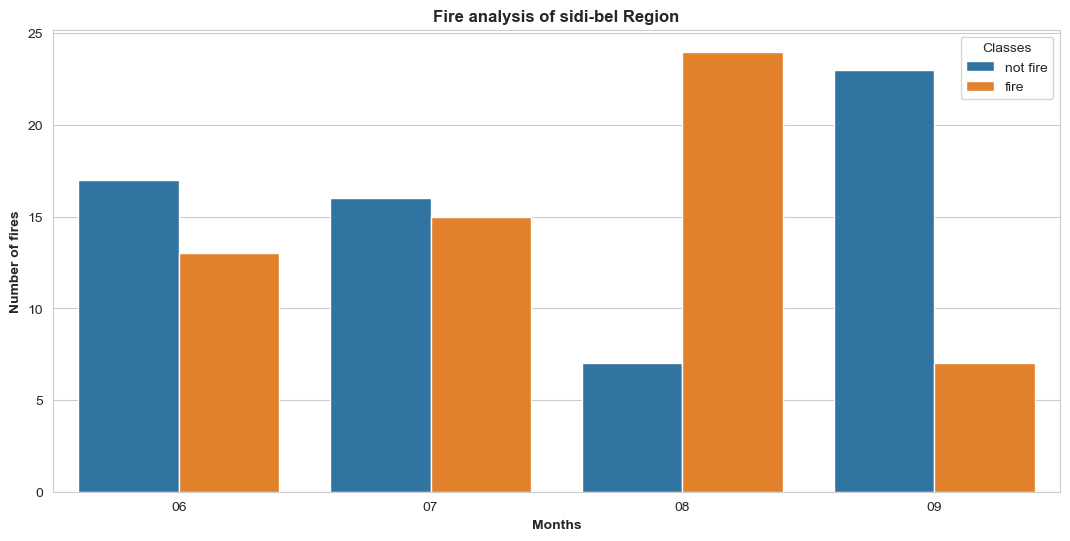

In [35]:
dftemp0=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp0)
plt.ylabel("Number of fires",weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire analysis of sidi-bel Region",weight='bold')

In [36]:
df.groupby(['Region','month'])['Classes'].value_counts()

Region  month  Classes 
0       06     not fire    17
               fire        13
        07     not fire    16
               fire        15
        08     fire        24
               not fire     7
        09     not fire    23
               fire         7
1       06     not fire    18
               fire        12
        07     fire        23
               not fire     8
        08     fire        27
               not fire     4
        09     fire        16
               not fire    14
Name: count, dtype: int64

In [39]:
df_copy['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [40]:
#Independent and Dependent Features
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

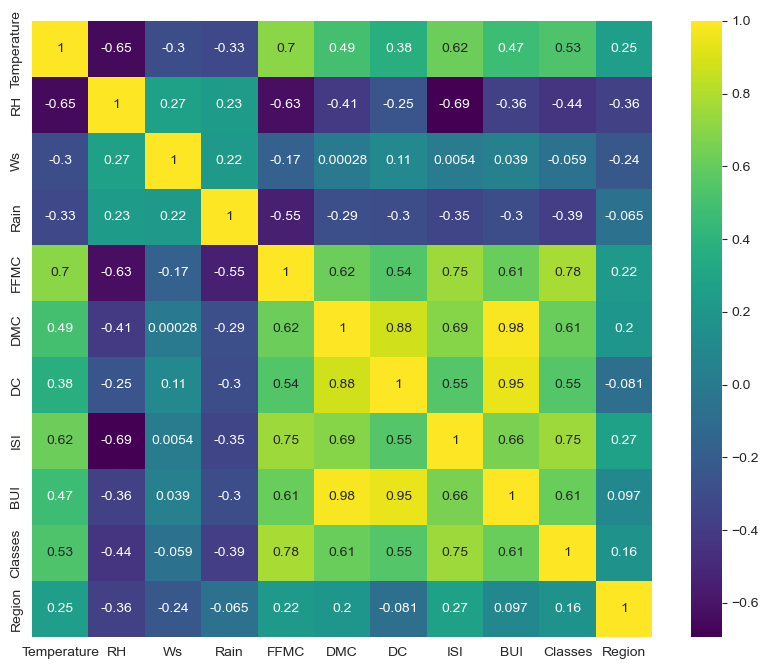

In [45]:
#Check for multicollinearity
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='viridis')

In [46]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)): #i=0,1,2,3 zero will not run
        for j in range(i): #zero will run and comparison will happen
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
#Threshold-domain expertise
corr_features=correlation(X_train,0.85)

In [48]:
#Drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [49]:
#Feature Scaling/standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error

In [52]:
#Linear regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)
y_predict=regression.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the score is {score}")

 The mean absolute error is 0.5838063599546962 and the score is 0.983523052949508


In [61]:
#Lasso Regression
lasso=Lasso()
lasso.fit(X_train,y_train)
y_predict=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the r2 score is {score}")

 The mean absolute error is 1.145997996939169 and the r2 score is 0.9497712193501187


In [62]:
#Ridge Regression
ridge=Ridge()
ridge.fit(X_train,y_train)
y_predict=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the score is {score}")

 The mean absolute error is 0.6125515638101013 and the score is 0.982698355229298


In [63]:
#Elastic Regression
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_predict=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the score is {score}")

 The mean absolute error is 1.8915134363047037 and the score is 0.8731354681001338


# CROSS VALIDATION

In [56]:
#Lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(X_train,y_train)
y_predict=lassocv.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the score is {score}")

 The mean absolute error is 0.6701641696301902 and the score is 0.9808648686248684


In [57]:
#Ridge
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_predict=ridgecv.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the score is {score}")

 The mean absolute error is 0.8566908888843255 and the score is 0.972992811439674


In [58]:
#Elastic
from sklearn.linear_model import ElasticNetCV
elasticCV=ElasticNetCV()
elasticCV.fit(X_train,y_train)
y_predict=elasticCV.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print(f" The mean absolute error is {mae} and the score is {score}")

 The mean absolute error is 0.7295307419548663 and the score is 0.9789324233433637


In [67]:
import pickle
pickle.dump(ridge,open('forest.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [65]:
m=pickle.load(open('forest.pkl','rb
                   '))

In [66]:
m.predict(X_test)

array([ 8.23652556,  7.72274114,  7.05078835,  6.80652187,  6.77542121,
       10.60338652, 10.90438459,  2.74867831,  1.53376582,  3.40661182,
        0.52627106,  9.82950045,  9.32986017, 28.87285526, 18.52343163,
        0.72523815,  4.37383326, -0.19520896,  7.19297995,  6.34931447,
        1.42406369,  0.18300326,  6.55268631,  0.36557834, 20.84287711,
       14.32336397,  5.99463625,  9.88802035, -0.33316198, 14.98969479,
        6.71524503, -0.52609437, 10.45667533, 14.68152794,  1.45034249,
        3.22505528,  2.15926112,  6.30751029, -0.22101102,  0.03274269,
        6.83435442,  1.62593102,  8.51980744, -0.32992166, 15.36076427,
        8.38893186,  9.82166738,  1.37095349, -0.15234452,  1.25695819,
       29.36970807,  3.99075656, 12.80011576, 19.36085701, 13.86657719,
       16.35177363,  9.87549135,  9.11997742,  3.74492281, 14.61983663,
        9.92573857])